<a href="https://colab.research.google.com/github/g7mack/Machine-Learning-Engineering/blob/main/MLE_ICA_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

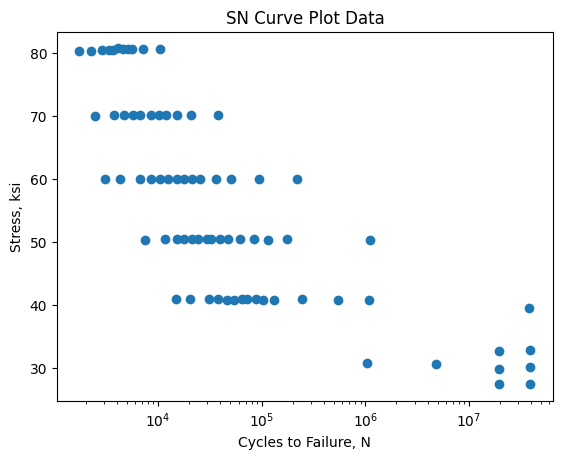

In [47]:
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('SN Curve Plot Data.csv')

plt.scatter(df['x'], df[' y'])

plt.xscale('log')

plt.xlabel('Cycles to Failure, N')
plt.ylabel('Stress, ksi')
plt.title('SN Curve Plot Data')

plt.show()

In [48]:
#Tag run out points as '1'
df["sample_type"] = 0
df.loc[df['x'] > 1e7, 'sample_type'] = 1
display(df)

,x,y,sample_type
0,1.741503e+03,80.267262,0
1,2.254944e+03,80.267262,0
2,2.853945e+03,80.467701,0
3,3.373283e+03,80.467701,0
4,3.667386e+03,80.400892,0
...,...,...,...
69,1.966659e+07,29.888634,1
70,1.966659e+07,27.416475,1
71,3.867753e+07,27.483295,1
72,3.897259e+07,30.089081,1


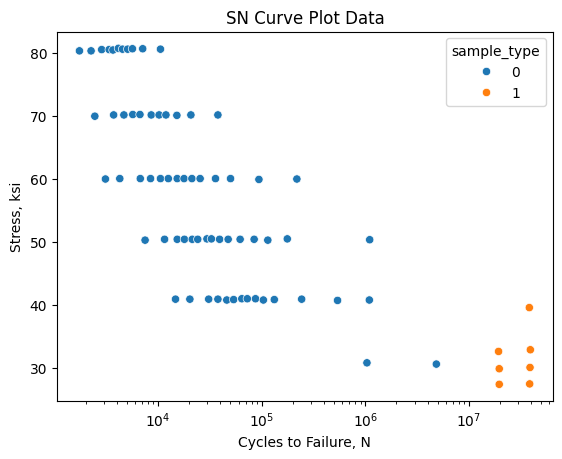

In [49]:
import seaborn as sns
sns.scatterplot(x='x', y=' y', hue='sample_type', data=df)
plt.xscale('log')
plt.xlabel('Cycles to Failure, N')
plt.ylabel('Stress, ksi')
plt.title('SN Curve Plot Data')
plt.show()

In [50]:
x = df[['x', ' y']].to_numpy()

y_targets = df['sample_type'].to_numpy()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y_targets, test_size=0.5, random_state=42, stratify=y_targets)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [52]:
knn.score(x_test, y_test)

1.0

In [53]:
knn.predict(x_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

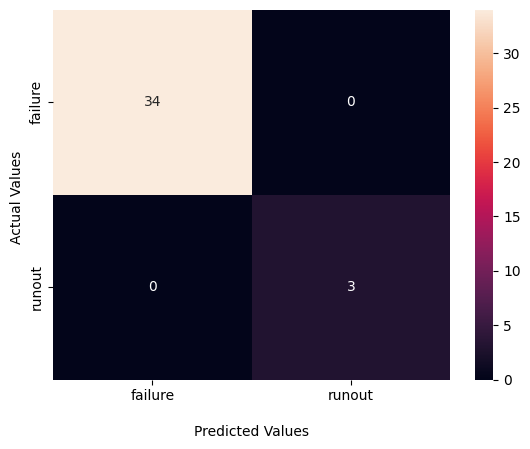

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00         3

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



In [54]:
cm = confusion_matrix(y_test, knn.predict(x_test))
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_xticklabels(['failure', 'runout'])
ax.set_yticklabels(['failure', 'runout'])
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

print(classification_report(y_test, knn.predict(x_test)))

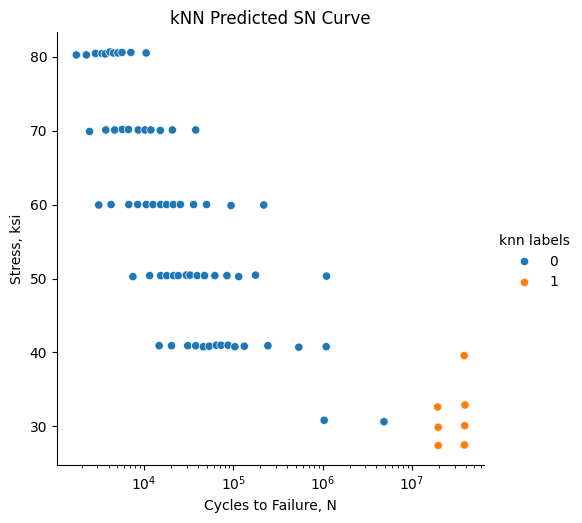

In [55]:
df['knn labels'] = knn.predict(x)
sns.pairplot(df, x_vars='x', y_vars=' y', hue='knn labels', height=5)
plt.xscale('log')
plt.xlabel('Cycles to Failure, N')
plt.ylabel('Stress, ksi')
plt.title('kNN Predicted SN Curve')
plt.show()